In [ ]:
import pandas as pd
import numpy as np

In [ ]:
DrDoS_LDAP_data_2_0_per = pd.read_csv('LDAP.csv')
DrDoS_MSSQL_data_1_3_per = pd.read_csv('MSSQL.csv')
DrDoS_UDP_data_2_per = pd.read_csv('UDP.csv')
UDPLag_data_2_0_per = pd.read_csv('UDPLag.csv')

C:\Users\moahmed hanyy\AppData\Local\Temp\ipykernel_14376\1883736320.py:1: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  DrDoS_LDAP_data_2_0_per = pd.read_csv('LDAP.csv')
C:\Users\moahmed hanyy\AppData\Local\Temp\ipykernel_14376\1883736320.py:2: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  DrDoS_MSSQL_data_1_3_per = pd.read_csv('MSSQL.csv')
C:\Users\moahmed hanyy\AppData\Local\Temp\ipykernel_14376\1883736320.py:3: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  DrDoS_UDP_data_2_per = pd.read_csv('UDP.csv')
C:\Users\moahmed hanyy\AppData\Local\Temp\ipykernel_14376\1883736320.py:4: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  UDPLag_data_2_0_per = pd.read_csv('UDPLag.csv')


In [ ]:
# Merge all the Dataset to make one data
data = pd.concat([DrDoS_LDAP_data_2_0_per, DrDoS_MSSQL_data_1_3_per, DrDoS_UDP_data_2_per, UDPLag_data_2_0_per], ignore_index = True)

In [ ]:
data.shape

(11574902, 88)

In [ ]:
data[' Label'].value_counts()

 Label
MSSQL      4966213
UDP        3867155
LDAP       1915122
Syn         606749
NetBIOS     202919
BENIGN       14870
UDPLag        1873
Name: count, dtype: int64

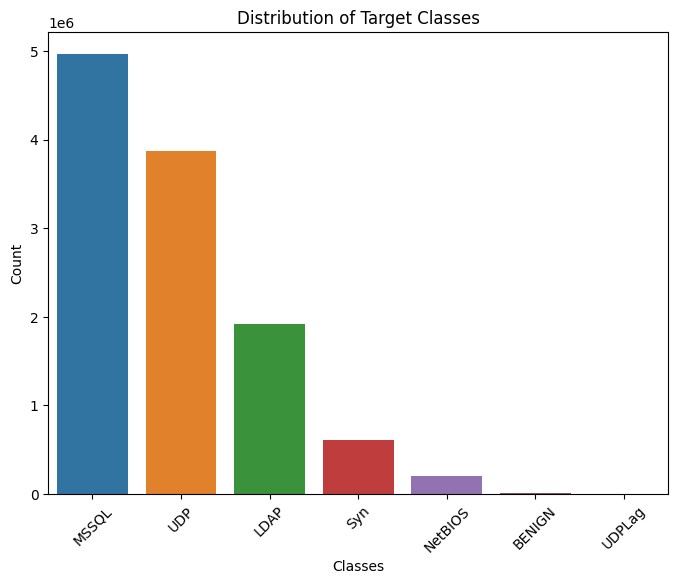

In [ ]:
label_counts = data[' Label'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=label_counts.index, y=label_counts.values)
plt.title('Distribution of Target Classes')
plt.xlabel('Classes')
plt.ylabel('Count')
plt.xticks(rotation=45)  # In case the class names are long
plt.show()

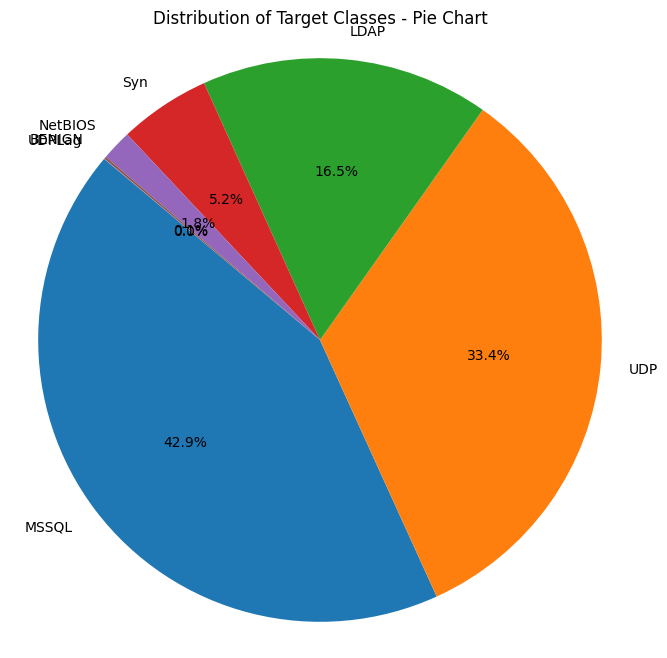

In [ ]:
# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Target Classes - Pie Chart')
plt.axis('equal')
plt.show()

In [ ]:
# Drop Unnamed:0
data = data.drop(['Unnamed: 0'], axis = 1)

In [ ]:
data.columns

Index(['Flow ID', ' Source IP', ' Source Port', ' Destination IP',
       ' Destination Port', ' Protocol', ' Timestamp', ' Flow Duration',
       ' Total Fwd Packets', ' Total Backward Packets',
       'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Min',
       ' Fwd Packet Length Mean', ' Fwd Packet Length Std',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s',
       ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max',
       ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std',
       ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean',
       ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags',
       ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Length', ' Max Pa

In [ ]:
data_real = data.replace(np.inf, np.nan)

In [ ]:
data_real.isnull().sum().sum()

686328

In [ ]:
data_df = data_real.dropna(axis=0)

In [ ]:
data_df.isnull().sum().sum()

0

In [ ]:
data_df

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label
0,172.16.0.5-192.168.50.4-870-2908-17,172.16.0.5,870,192.168.50.4,2908,17,2018-11-03 10:09:00.565557,1.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,NetBIOS
1,172.16.0.5-192.168.50.4-871-53796-17,172.16.0.5,871,192.168.50.4,53796,17,2018-11-03 10:09:00.565559,48.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,NetBIOS
2,172.16.0.5-192.168.50.4-648-40660-17,172.16.0.5,648,192.168.50.4,40660,17,2018-11-03 10:09:00.565608,1.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,NetBIOS
3,172.16.0.5-192.168.50.4-872-54308-17,172.16.0.5,872,192.168.50.4,54308,17,2018-11-03 10:09:00.565993,1.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,NetBIOS
4,172.16.0.5-192.168.50.4-873-40653-17,172.16.0.5,873,192.168.50.4,40653,17,2018-11-03 10:09:00.565994,1.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,NetBIOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11574897,172.16.0.5-192.168.50.4-38133-51501-6,172.16.0.5,38133,192.168.50.4,51501,6,2018-11-03 11:30:25.829961,1.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,Syn
11574898,172.16.0.5-192.168.50.4-38134-22514-6,172.16.0.5,38134,192.168.50.4,22514,6,2018-11-03 11:30:25.830168,1.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,Syn
11574899,172.16.0.5-192.168.50.4-38135-54928-6,172.16.0.5,38135,192.168.50.4,54928,6,2018-11-03 11:30:25.830169,105.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,Syn
11574900,172.16.0.5-192.168.50.4-38136-50486-6,172.16.0.5,38136,192.168.50.4,50486,6,2018-11-03 11:30:25.830219,1.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,Syn


In [ ]:
def balance_dataset(data, target, final_sample_size):
    # Calculate the target number of samples per class
    target_samples_per_class = final_sample_size // len(data[target].unique())

    balanced_data = pd.DataFrame()
    class_counts = data[target].value_counts()

    # Under-sample or over-sample each class to the target number of samples
    for class_label in class_counts.index:
        class_data = data[data[target] == class_label]

        if class_data.shape[0] > target_samples_per_class:
            # If the class has more samples than needed, under-sample it
            class_sample = class_data.sample(n=target_samples_per_class, random_state=42)
        else:
            # If the class has fewer samples than needed, over-sample it
            # Simple random oversampling with replacement
            class_sample = class_data.sample(n=target_samples_per_class, replace=True, random_state=42)

        balanced_data = pd.concat([balanced_data, class_sample], axis=0)

    return balanced_data

In [ ]:
# Apply the balancing function to your dataset
new_data = balance_dataset(data_df, ' Label', final_sample_size=1000000)

In [ ]:
# Check the new class distribution
print(new_data[' Label'].value_counts())

 Label
MSSQL      142857
UDP        142857
LDAP       142857
Syn        142857
NetBIOS    142857
BENIGN     142857
UDPLag     142857
Name: count, dtype: int64


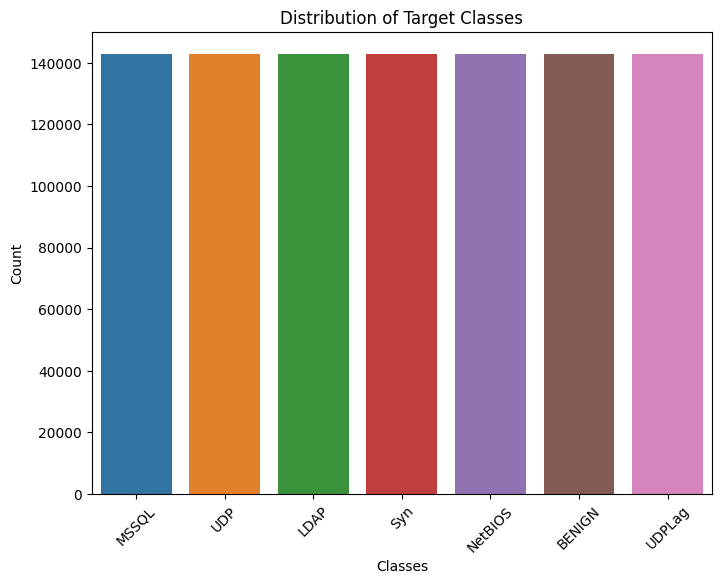

In [ ]:
label_counts = new_data[' Label'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=label_counts.index, y=label_counts.values)
plt.title('Distribution of Target Classes')
plt.xlabel('Classes')
plt.ylabel('Count')
plt.xticks(rotation=45)  # In case the class names are long
plt.show()

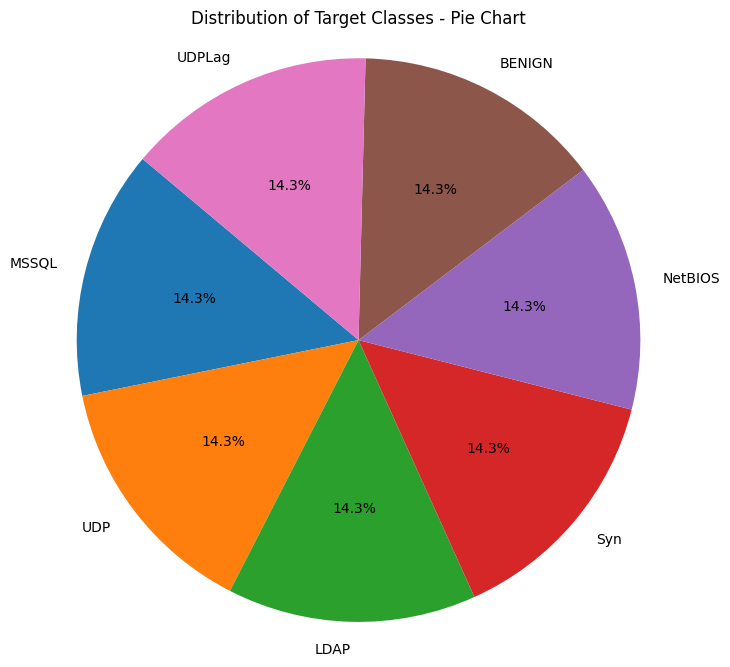

In [ ]:
# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Target Classes - Pie Chart')
plt.axis('equal')
plt.show()

### Save File as CSV with 1M rows

In [ ]:
new_data.to_csv('final_data.csv', index=False)

In [ ]:
new_data.info

<bound method DataFrame.info of                                          Flow ID     Source IP   Source Port  \
2764444    172.16.0.5-192.168.50.4-5149-39433-17    172.16.0.5          5149   
5785726   172.16.0.5-192.168.50.4-61791-46546-17    172.16.0.5         61791   
6334480    172.16.0.5-192.168.50.4-61850-4222-17    172.16.0.5         61850   
2862691   172.16.0.5-192.168.50.4-35881-23108-17    172.16.0.5         35881   
2699383    172.16.0.5-192.168.50.4-7691-22489-17    172.16.0.5          7691   
...                                          ...           ...           ...   
10964127  172.16.0.5-192.168.50.4-41450-31104-17    172.16.0.5         41450   
10964584  172.16.0.5-192.168.50.4-36766-60588-17    172.16.0.5         36766   
10965022  172.16.0.5-192.168.50.4-45787-46438-17  192.168.50.4         46438   
10964592  172.16.0.5-192.168.50.4-48224-27001-17    172.16.0.5         48224   
10963875  172.16.0.5-192.168.50.4-49440-22378-17    172.16.0.5         49440   

       

In [ ]:
new_data.describe

<bound method NDFrame.describe of                                          Flow ID     Source IP   Source Port  \
2764444    172.16.0.5-192.168.50.4-5149-39433-17    172.16.0.5          5149   
5785726   172.16.0.5-192.168.50.4-61791-46546-17    172.16.0.5         61791   
6334480    172.16.0.5-192.168.50.4-61850-4222-17    172.16.0.5         61850   
2862691   172.16.0.5-192.168.50.4-35881-23108-17    172.16.0.5         35881   
2699383    172.16.0.5-192.168.50.4-7691-22489-17    172.16.0.5          7691   
...                                          ...           ...           ...   
10964127  172.16.0.5-192.168.50.4-41450-31104-17    172.16.0.5         41450   
10964584  172.16.0.5-192.168.50.4-36766-60588-17    172.16.0.5         36766   
10965022  172.16.0.5-192.168.50.4-45787-46438-17  192.168.50.4         46438   
10964592  172.16.0.5-192.168.50.4-48224-27001-17    172.16.0.5         48224   
10963875  172.16.0.5-192.168.50.4-49440-22378-17    172.16.0.5         49440   

     